I was plotting zclip and no zclip backtests to make sure theyre not too different, we can still zclip but it must be after uni selection

<Figure size 1400x600 with 0 Axes>

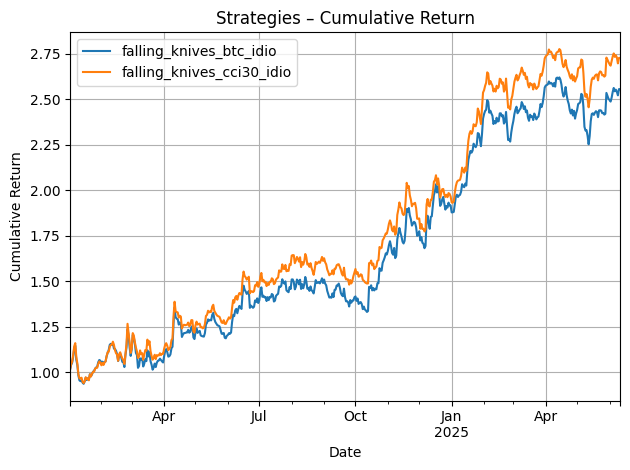

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1. Load all backtest CSVs
backtest_dir = Path("./")
all_csvs = list(backtest_dir.glob("*.csv"))

dfs = []
for csv_file in all_csvs:
    df = pd.read_csv(csv_file, parse_dates=["timestamp"]).set_index("timestamp")
    dfs.append(df)

returns_df = pd.concat(dfs, axis=1).dropna()
# returns_df = returns_df[['binance_equal_weighted_short_listings', 'bybit_equal_weighted_short_listings']]
# returns_df['mean'] = returns_df.mean(axis=1)

# vol target to 20%
# returns_df = returns_df.div(returns_df.std(axis=0), axis=1) * 0.2

# 2. Plot equity curves (cumulative returns)
cumulative_returns = 1 + returns_df.cumsum()
plt.figure(figsize=(14, 6))
cumulative_returns.plot(title="Strategies – Cumulative Return", grid=True)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

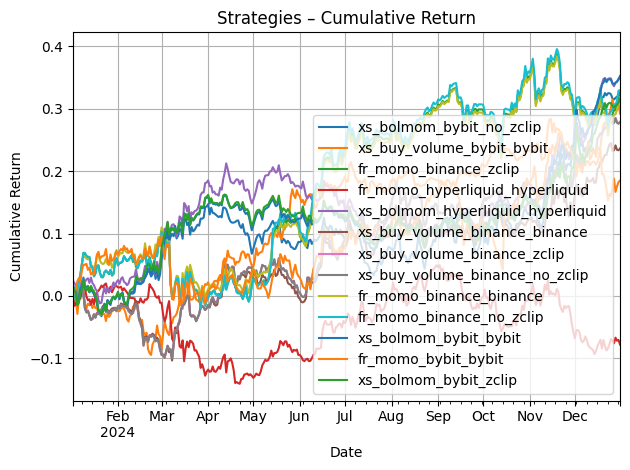

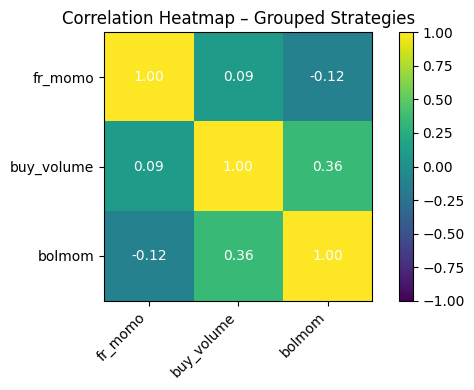

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from pathlib import Path

# # 1. Load all backtest CSVs
# backtest_dir = Path("./")
# all_csvs = list(backtest_dir.glob("*.csv"))

# dfs = []
# for csv_file in all_csvs:
#     df = pd.read_csv(csv_file, parse_dates=["timestamp"]).set_index("timestamp")
#     dfs.append(df)

# returns_df = pd.concat(dfs, axis=1).dropna()

# # 2. Plot equity curves (cumulative returns)
# cumulative_returns = returns_df.cumsum()
# plt.figure(figsize=(14, 6))
# cumulative_returns.plot(title="Strategies – Cumulative Return", grid=True)
# plt.xlabel("Date")
# plt.ylabel("Cumulative Return")
# plt.tight_layout()
# plt.show()

# # 3. Identify strategy families
# fr_momo_cols    = [c for c in returns_df.columns if "fr_momo"    in c]
# buy_volume_cols = [c for c in returns_df.columns if "buy_volume"  in c]
# bolmom_cols     = [c for c in returns_df.columns if "bolmom"      in c]

# # 4. Average returns within each family
# group_returns = pd.DataFrame({
#     "fr_momo"   : returns_df[fr_momo_cols].mean(axis=1),
#     "buy_volume": returns_df[buy_volume_cols].mean(axis=1),
#     "bolmom"    : returns_df[bolmom_cols].mean(axis=1),
# })

# # 5. Compute correlation matrix
# corr = group_returns.corr()

# # 6. Plot heatmap with Matplotlib
# fig, ax = plt.subplots(figsize=(6, 4))
# im = ax.imshow(corr, vmin=-1, vmax=1)

# ax.set_xticks(range(len(corr.columns)))
# ax.set_xticklabels(corr.columns, rotation=45, ha="right")
# ax.set_yticks(range(len(corr.index)))
# ax.set_yticklabels(corr.index)

# for i in range(len(corr)):
#     for j in range(len(corr)):
#         ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="white")

# plt.title("Correlation Heatmap – Grouped Strategies")
# fig.colorbar(im, ax=ax)
# plt.tight_layout()
# plt.show()


sharpe: 2.6419237278031775


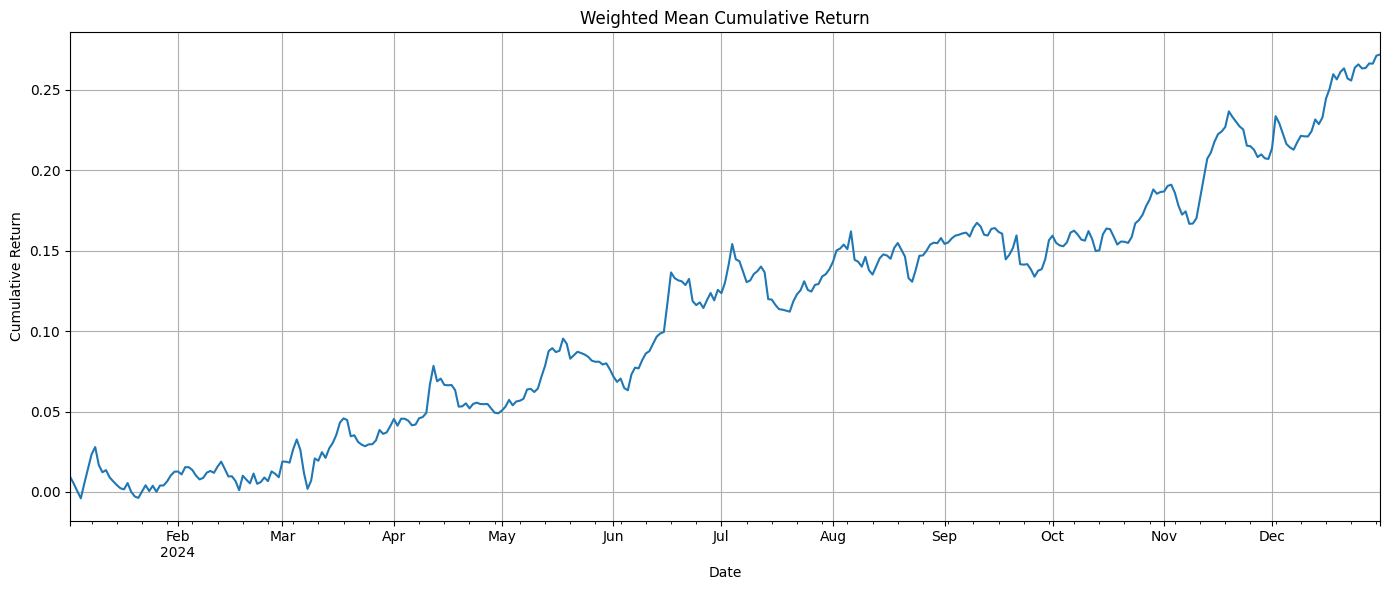

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # assume group_returns is your DataFrame with columns ["fr_momo","buy_volume","bolmom"]

# # 1) define your weights (must sum to 1)
# w = pd.Series({
#     "fr_momo"   : 0.33,
#     "buy_volume": 0.333,
#     "bolmom"    : 0.33
# })

# # 2) compute the weighted return series
# weighted_return = group_returns.dot(w)

# print(f"sharpe: {np.sqrt(365)*weighted_return.mean()/weighted_return.std() }")

# # 3) cumulative
# cum_weighted = weighted_return.cumsum()

# # 4) plot
# plt.figure(figsize=(14, 6))
# cum_weighted.plot(title="Weighted Mean Cumulative Return", grid=True)
# plt.xlabel("Date")
# plt.ylabel("Cumulative Return")
# plt.tight_layout()
# plt.show()
